In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("diabetes.csv")

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Features in Diabetese Dataset

In [8]:
features=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target=['Outcome']

In [9]:
x=df[features]
y=df[target]

# Linear Regression

In [10]:
lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,x,y,scoring='neg_mean_squared_error',cv=6)
mean_mse=np.mean(mse)
print("Mean squared error is:",mean_mse)

Mean squared error is: -0.16240904455081182


# Ridge Regression

In [11]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits 
ridge_reg.fit(x,y)

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

# Lasso Regression

In [17]:
Lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,2,3,4,5,6,7,8,9,10,15,16,17,18,19,20,30,35,40,45,50,55,100]}
Lasso_reg=GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=6) #we have to find which value of lambda suits 
Lasso_reg.fit(x,y)

C:\Users\apoor\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.008421694499042, tolerance: 0.014468593750000003
  model = cd_fast.enet_coordinate_descent(
C:\Users\apoor\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6260083787443591, tolerance: 0.014844375
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=6, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20,
                                   30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

# Best Parameters

In [19]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 19}
-0.1622934948680884
{'alpha': 0.001}
-0.1623154050176585


C:\Users\apoor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

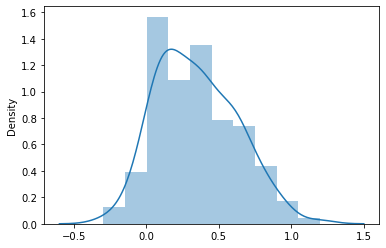

In [20]:
import seaborn as sns
sns.distplot(pred_ridge)

C:\Users\apoor\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

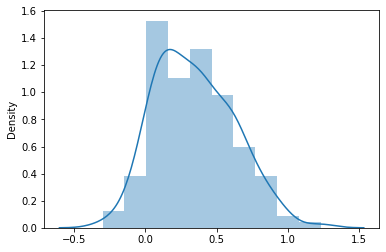

In [21]:
import seaborn as sns
sns.distplot(pred_lasso)